<a href="https://colab.research.google.com/github/dokin0802/SinGAN/blob/master/augmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

N_EPOCHS = 50
N_BATCH = 20

learning_rate = 0.001
dropout_rate = 0.5

np.random.seed(1)
tf.random.set_seed(1)


def create_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=3, padding="SAME", activation='relu', 
                            input_shape=(150,150,3)))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(64, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(128, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(128, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [3]:
train_dir = '/content/gdrive/MyDrive/architecture_aug/train'
validation_dir = '/content/gdrive/MyDrive/architecture_aug/val'
test_dir = '/content/gdrive/MyDrive/architecture_small/test'

In [4]:
import shutil
def split(img_list, val_count, train_path, val_path):
  val_files=[]
  for i in random.sample(img_list, val_count):
    val_files.append(i)
  
  train_files = [x for x in img_list if x not in val_files]

  for k in train_files:
    shutil.copy(k,train_path)
  for c in val_files:
    shutil.copy(c,val_path)

In [5]:
import os
import glob
import random

g_train_path= '/content/gdrive/MyDrive/architecture_aug/train/g'
r_train_path= '/content/gdrive/MyDrive/architecture_aug/train/r'
g_val_path= '/content/gdrive/MyDrive/architecture_aug/val/g'
r_val_path= '/content/gdrive/MyDrive/architecture_aug/val/r'

split(glob.glob('/content/gdrive/MyDrive/architecture_aug/org/g/*'), 50, g_train_path,g_val_path)
split(glob.glob('/content/gdrive/MyDrive/architecture_aug/org/r/*'), 50, r_train_path,r_val_path)

In [10]:
len(os.listdir(os.path.join(os.path.join('/content/gdrive/MyDrive/architecture_aug/val/g'))))

50

In [8]:
import os
import glob
path = '/content/gdrive/MyDrive/architecture_aug/train'
g = glob.glob(path+'/g'+'/*')
r = glob.glob(path+'/r'+'/*')

def rename(files):
  if 'g' in files[0]:
    for i,f in enumerate(files):
      os.rename(f, os.path.join(path+"/g", 'g_' + '{0:03d}.jpg'.format(i)))
    g = glob.glob(path+'/g'+'/*')
  
  elif 'r' in files[0]:
    for i,f in enumerate(files):
      os.rename(f, os.path.join(path+"/r", 'r_' + '{0:03d}.jpg'.format(i)))
    r = glob.glob(path+'/r'+'/*')

In [10]:
rename(g)
rename(r)

FileNotFoundError: ignored

FileNotFoundError: ignored

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen =  ImageDataGenerator(rescale=1/255) 

In [12]:
train_generator = train_datagen.flow_from_directory(
                                    train_dir, 
                                    target_size=(150,150), 
                                    class_mode='binary',
                                    batch_size=N_BATCH   
                                )

validation_generator = test_datagen.flow_from_directory(
                                    validation_dir,
                                    target_size=(150,150), 
                                    class_mode='binary', 
                                    batch_size=N_BATCH   
                                )
# Test Set
test_generator = test_datagen.flow_from_directory(
                                    test_dir, 
                                    target_size=(150,150), 
                                    class_mode='binary', 
                                    batch_size=N_BATCH  
                                )

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [13]:
train_generator.class_indices # {'g': 0, 'dogs': 1}


len(train_generator), len(validation_generator), len(test_generator) # (100, 50, 50)


batch = train_generator.next() #2

len(batch), type(batch) #(2, tuple)

type(batch[0]), batch[0].shape # (numpy.ndarray, (20, 150, 150, 3))

(numpy.ndarray, (20, 150, 150, 3))

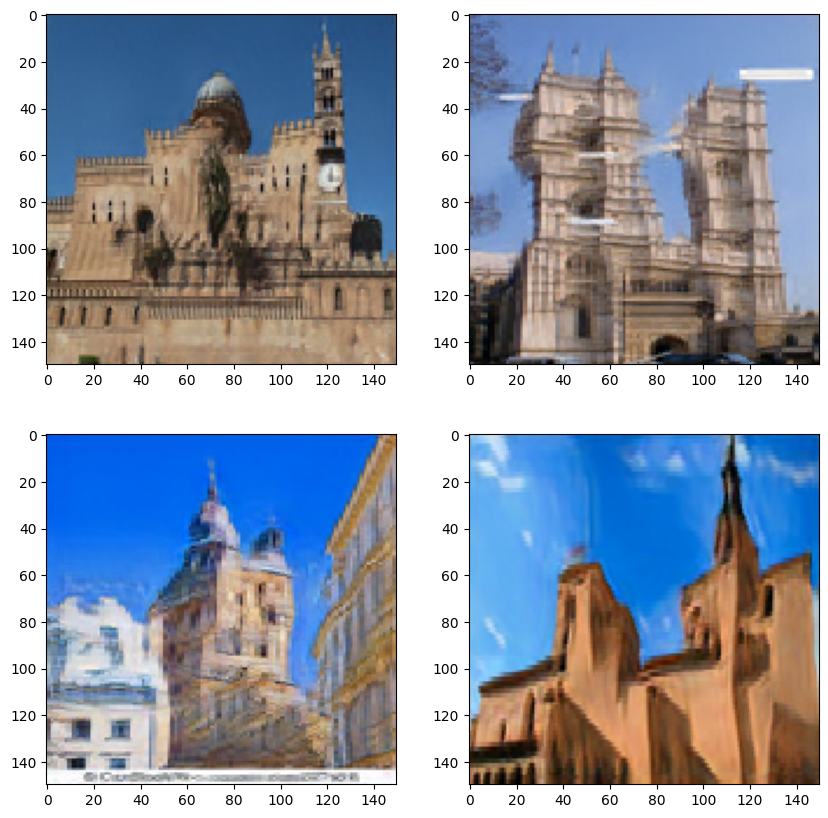

In [14]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(batch[0][i])
plt.show()   

In [15]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='binary_crossentropy',  
              metrics=['accuracy'])


history= model.fit(train_generator, 
                    epochs=N_EPOCHS,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator, 
                    validation_steps = len(validation_generator)
                    )
     

Epoch 1/50
20/20 [==============================] - 14s 73ms/step - loss: 0.4355 - accuracy: 0.7925 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 2/50
20/20 [==============================] - 1s 65ms/step - loss: 0.0624 - accuracy: 0.9825 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/50
20/20 [==============================] - 1s 69ms/step - loss: 0.0176 - accuracy: 0.9900 - val_loss: 4.8288e-04 - val_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 1s 66ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 8.1114e-04 - val_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 1s 68ms/step - loss: 0.0080 - accuracy: 0.9950 - val_loss: 3.6573e-04 - val_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0102 - accuracy: 0.9975 - val_loss: 7.3624e-05 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.8484e-05 - val_accuracy:

In [12]:
from keras.models import load_model
model.save('/content/gdrive/My Drive/archi_0.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/archi_0.h5')
model.summary()

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


KeyError: ignored

In [18]:
model.evaluate(test_generator)

5/5 [==============================] - 19s 5s/step - loss: 9.3209 - acc: 0.4400


[9.320944786071777, 0.4399999976158142]